In [1]:
from datasets import PICNN_FNLVQR_Banana
import torch

In [2]:
synthetic_dataset = PICNN_FNLVQR_Banana()
X_train, y_train = synthetic_dataset.sample_joint(n_points=10**6)
tensor_dataset = torch.utils.data.TensorDataset(X_train, y_train)
dataloader = torch.utils.data.DataLoader(tensor_dataset, batch_size=1024)

In [3]:
from pushforward_operators import RectifiedJacobianFlowQuantile
from classes import TrainParameters

In [4]:
quantile = RectifiedJacobianFlowQuantile(
    feature_dimension=1,
    response_dimension=2,
    hidden_dimension=8,
    number_of_hidden_layers=2,
)

train_parameters = TrainParameters(
    number_of_epochs_to_train=20,
    optimizer_parameters=dict(
        lr=1e-1,
    ),
    scheduler_parameters=dict(
        eta_min=0
    ),
    verbose=True
)

In [5]:
_ = quantile.fit(
    dataloader=dataloader,
    train_parameters=train_parameters
)

Epoch: 20, Flow Loss: 2.2676, Jacobian Penalty: 0.0407, LR: 0.000000: 100%|██████████| 20/20 [04:23<00:00, 13.15s/it]
Epoch: 10, Flow Loss: 0.0164, Jacobian Penalty: 0.0193, LR: 0.000000: 100%|██████████| 10/10 [04:29<00:00, 26.90s/it]


In [ ]:
path_for_models_weights = "../attic/models/rectified_flow_jacobian/rectified_flow_jacobian_picnn_banana.pth"
# quantile.save(path=path_for_models_weights)
quantile = RectifiedJacobianFlowQuantile.load_class(path=path_for_models_weights).eval()

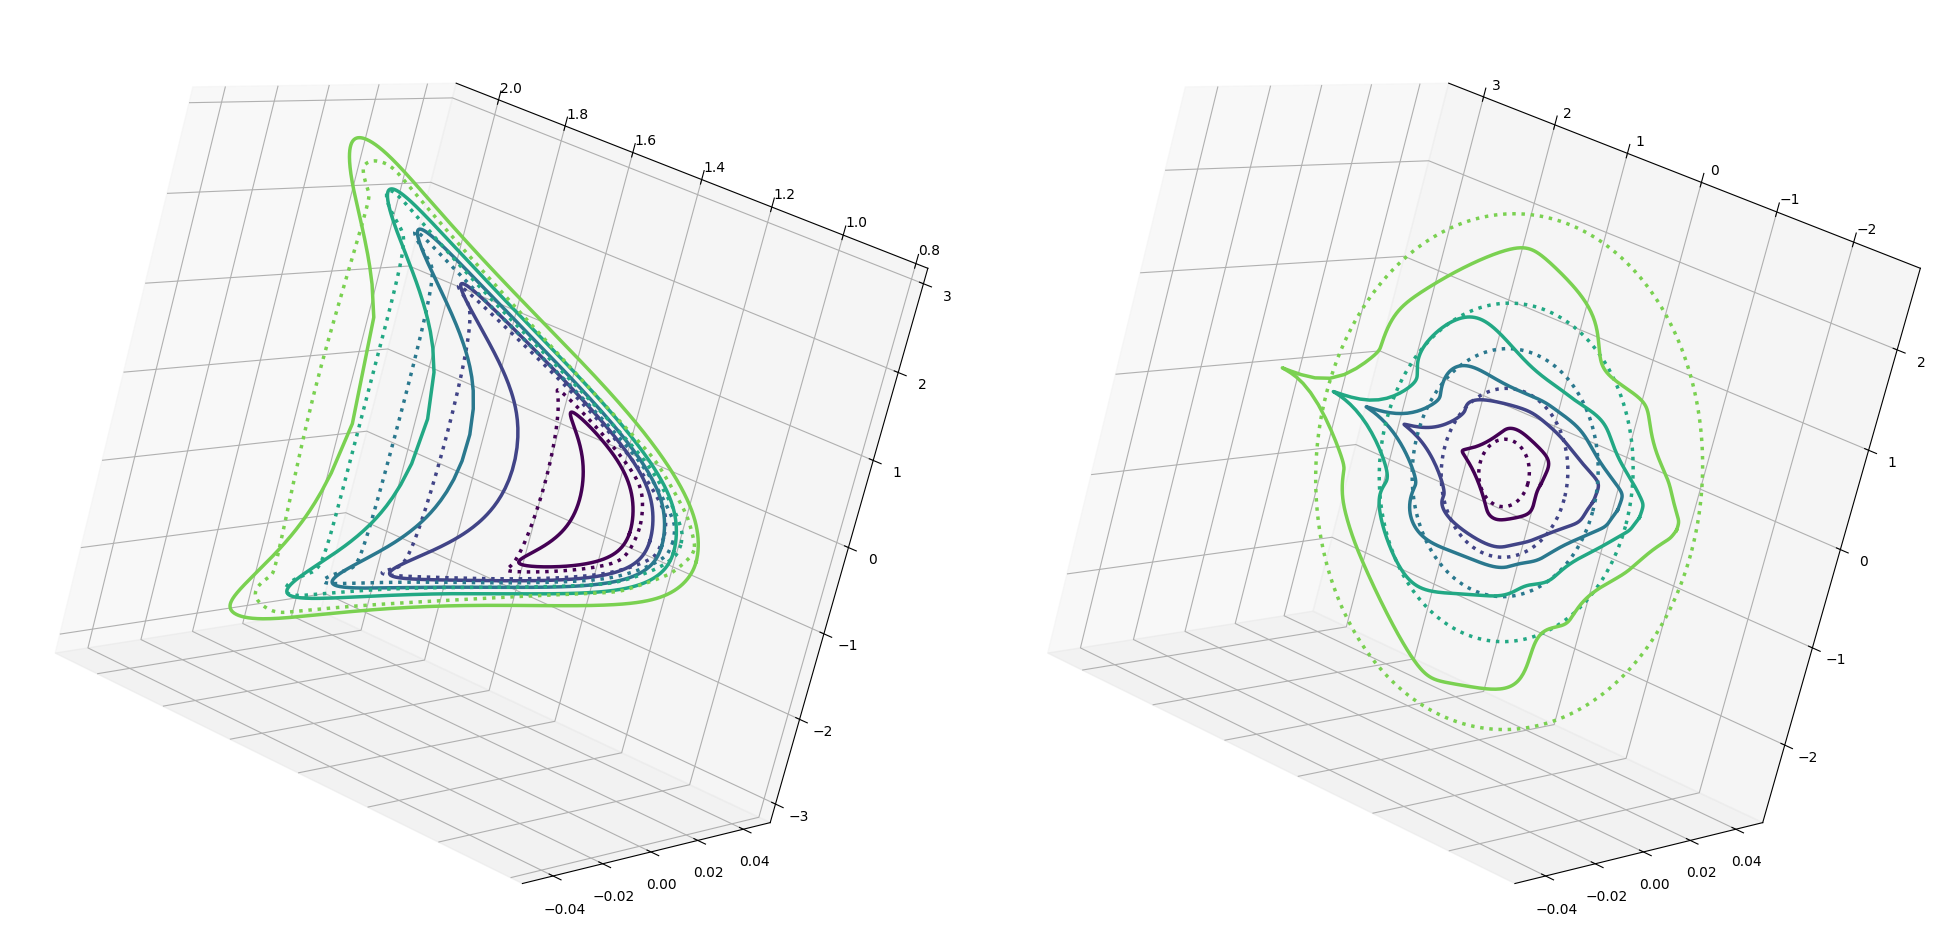

In [ ]:
from utils.plot import plot_quantile_levels_from_dataset

plot_quantile_levels_from_dataset(
    model=quantile, dataset=synthetic_dataset, conditional_value=torch.Tensor([[1.2]]),
    number_of_quantile_levels=5, tensor_parameters={}
)